# WALMART UPERMARKET ANALYSIS

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


# Loading the data set
pd.read_csv('walmart_sales.csv')
df = pd.read_csv('walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 1. DATA CLEANING

In [2]:
# Convert column headers to lower caps for ease of analysis
df.columns = df.columns.str.lower()
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [3]:
# Convert date from oject to date
df.date =  pd.to_datetime(df.date, format= '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## 2. DATA EXPLORATION

<Axes: >

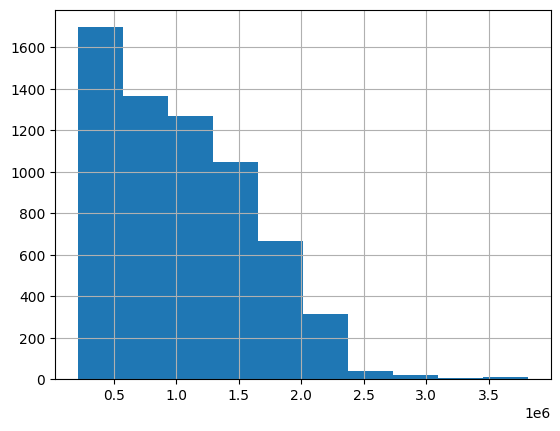

In [4]:
# Weekly sales
df.weekly_sales.hist()

<Axes: >

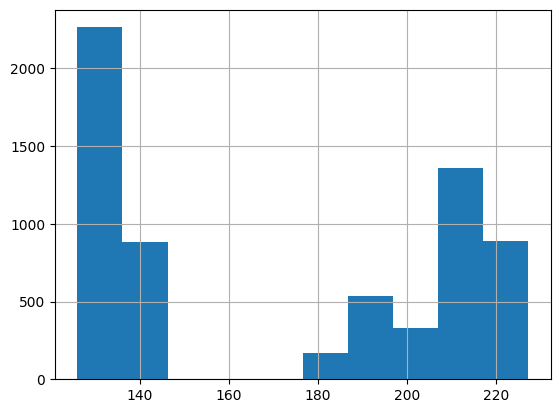

In [5]:
# consumer price index
df.cpi.hist()

In [6]:
df.describe()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [7]:
# Correlation
_corr = df.corr(numeric_only=True)
_corr.style.background_gradient(cmap='coolwarm')

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
store,1.000000,-0.335332,-0.000000,-0.022659,0.060023,-0.209492,0.223531
weekly_sales,-0.335332,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
holiday_flag,-0.000000,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
temperature,-0.022659,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
fuel_price,0.060023,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
cpi,-0.209492,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
unemployment,0.223531,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


## 3. PROBLEM STATEMENT

### 3.1 Sales Trend Analysis and Areas of Potential Opportunities

#### What patterns or trends can be observed in the weekly sales data over time? What areas for improvement that could positively impact sales? And, are there any seasonal or cyclical variations in the store's weekly sales?

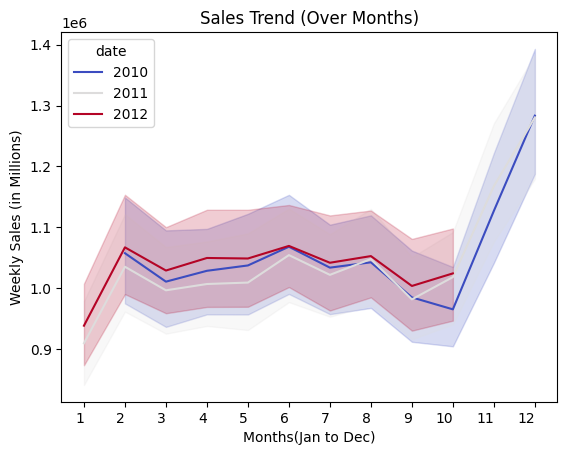

In [8]:
sns.lineplot(data=df, x = df['date'].dt.month, y = 'weekly_sales', hue = df['date'].dt.year, palette= 'coolwarm')
plt.xticks(np.arange(1, 13, 1))
plt.xlabel('Months(Jan to Dec)')
plt.ylabel('Weekly Sales (in Millions)')
plt.title('Sales Trend (Over Months)')
plt.xticks(ha='right');

Throughout 2010, 11 and 12,January has the lowest sales. 
February, June, August, October to December has the most sales peak
October to December has the highest sales peak. Promotional, pricing and operation effeciencies should be maximized during this period

### 3.2 Holiday Impact

#### How do holidays affect the store's weekly sales? Are sales significantly higher or lower during holiday periods? Which specific holidays have a noticeable impact (positive or negative) on sales?

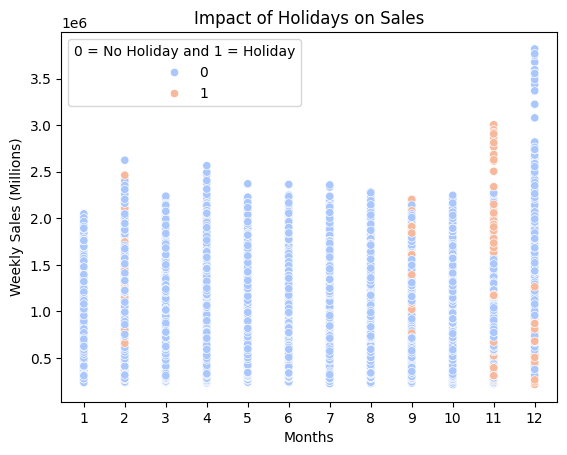

In [9]:
# Custom labels
custom_lab ={1:'Yes Holiday', 0: 'No Holiday'}
#ploting
sns.scatterplot(data=df, x=df['date'].dt.month, y='weekly_sales', hue='holiday_flag', palette='coolwarm')
plt.xticks(np.arange(1,13,1))
plt.ylabel("Weekly Sales (Millions)")
plt.xlabel('Months')
plt.legend(title= '0 = No Holiday and 1 = Holiday')
plt. title('Impact of Holidays on Sales');


In [10]:
df[['holiday_flag', 'weekly_sales']].corr(numeric_only=True)


,holiday_flag,weekly_sales
holiday_flag,1.000000,0.036891
weekly_sales,0.036891,1.000000


There is a positive but weak correlation between Holidays in a month and Weekly Sales. All months with holidays have higher sales than those with no holidays with the exception of October. Holidays in Novemeber and December contribute to the highest sales

### 3.3 External Factor Analysis

#### How do external factors such as temperature, fuel prices, consumer price index (CPI), and unemployment rates influence the store's weekly sales?

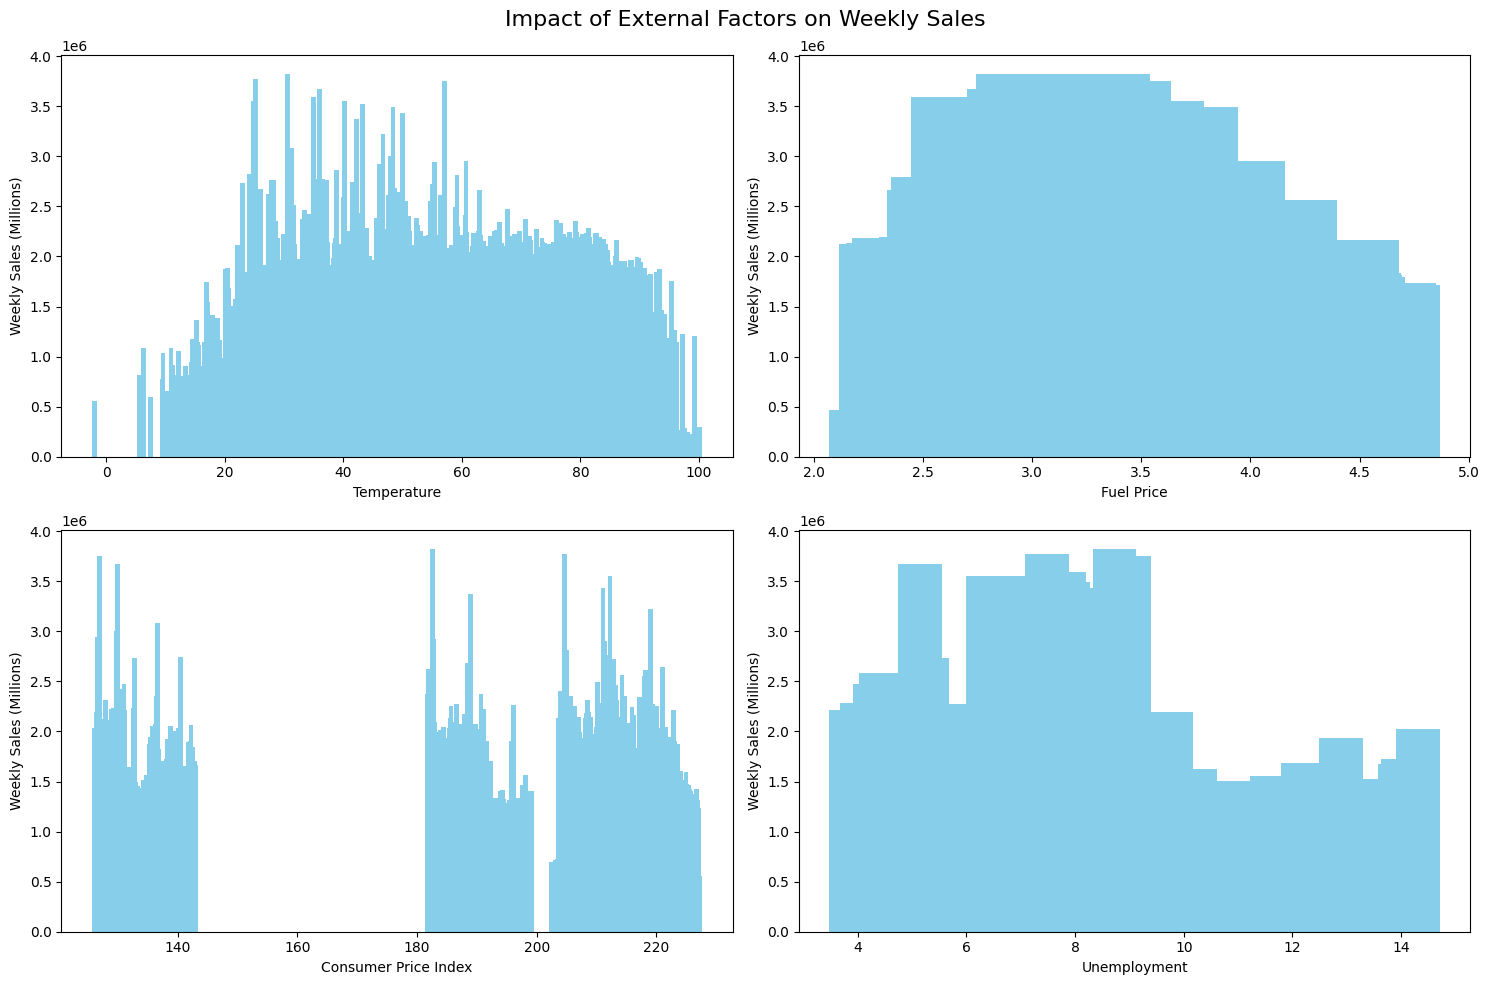

In [11]:

def subplot_bar(df, variable, xlabel):
    plt.bar(df[variable], df['weekly_sales'], color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel('Weekly Sales (Millions)')

# Setting figure size
plt.figure(figsize=(15, 10))

# Variables and corresponding x-labels
variables = ['temperature', 'fuel_price', 'cpi', 'unemployment']
xlabels = ['Temperature', 'Fuel Price', 'Consumer Price Index', 'Unemployment']

# Creating subplots
for i, (variable, xlabel) in enumerate(zip(variables, xlabels), start=1):
    plt.subplot(2, 2, i)
    subplot_bar(df, variable, xlabel)

plt.suptitle('Impact of External Factors on Weekly Sales', fontsize=16)
plt.tight_layout()
plt.show()




In [12]:
df[['temperature', 'fuel_price', 'cpi', 'unemployment', 'weekly_sales']].corr(numeric_only=True)

,temperature,fuel_price,cpi,unemployment,weekly_sales
temperature,1.000000,0.144982,0.176888,0.101158,-0.063810
fuel_price,0.144982,1.000000,-0.170642,-0.034684,0.009464
cpi,0.176888,-0.170642,1.000000,-0.302020,-0.072634
unemployment,0.101158,-0.034684,-0.302020,1.000000,-0.106176
weekly_sales,-0.063810,0.009464,-0.072634,-0.106176,1.000000


There is a negative correlation between sales and unemployment rate where high unemployment rate leads to a reduction in sales. There is a week positive correaltion between fuel price and sales. Temperature affects sales with highest sales being witnessed in temperatures of between 25-60. As seen, sales per consumer price index tend to decrease in each band. As the price of goods increases, less sales are realized